In [1]:
import numpy as np
from sklearn.model_selection import train_test_split


In [2]:
labels = np.load('labels.npy')
labels[labels == 1] = 0 

In [3]:
labels[labels == 2] = 1 
labels.shape

(40, 40)

In [4]:
import pandas as pd
kmean_clusters = pd.read_csv('km_res_clusters.csv')
kmean_clusters_np = kmean_clusters.to_numpy()

# 创建一个新的数组来存储只保留1值的结果
#kmean_clusters_M = np.copy(kmean_clusters_np)
kmean_clusters_M = kmean_clusters_np
# 将所有非 1 的值变为 0
kmean_clusters_M[kmean_clusters_M == 1] = 3

# 打印数组的形状
print(kmean_clusters_M.shape)

(1600, 1)


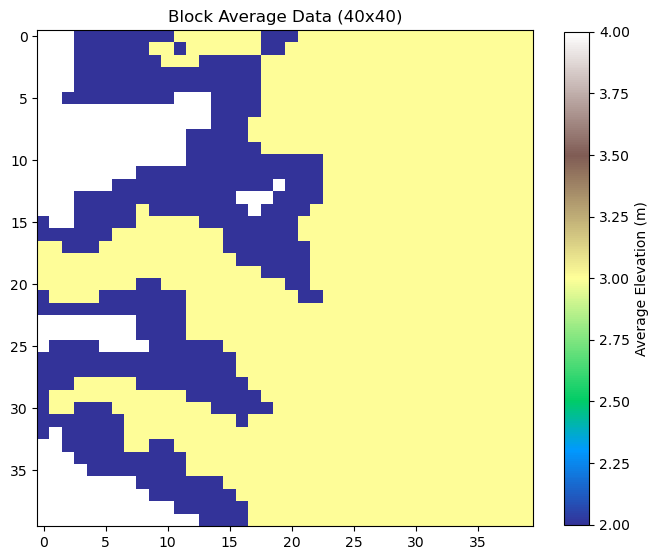

In [5]:
import matplotlib.pyplot as plt

kmean_M_2d = kmean_clusters_M.reshape((40, 40))


# 可视化 label_blocks_2d
plt.figure(figsize=(8, 8))
cmap = 'terrain'

plt.imshow(kmean_M_2d, cmap=cmap)
plt.colorbar(shrink=0.8, label='Average Elevation (m)')
plt.title('Block Average Data (40x40)')

plt.show()

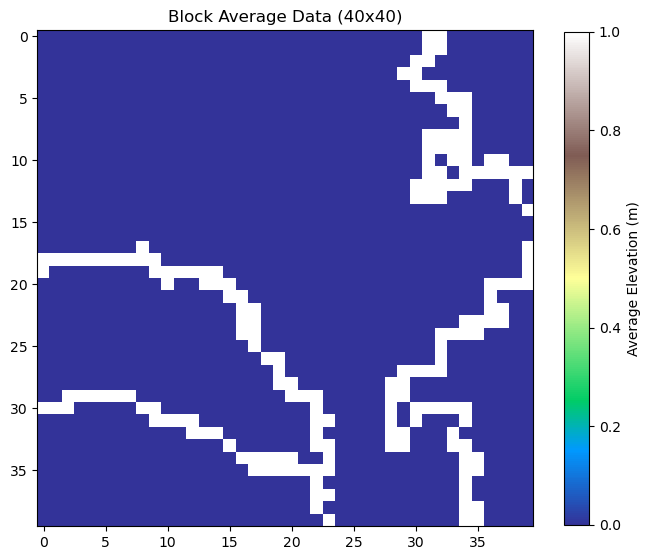

In [6]:
plt.figure(figsize=(8, 8))
cmap = 'terrain'

plt.imshow(labels, cmap=cmap)
plt.colorbar(shrink=0.8, label='Average Elevation (m)')
plt.title('Block Average Data (40x40)')

plt.show()

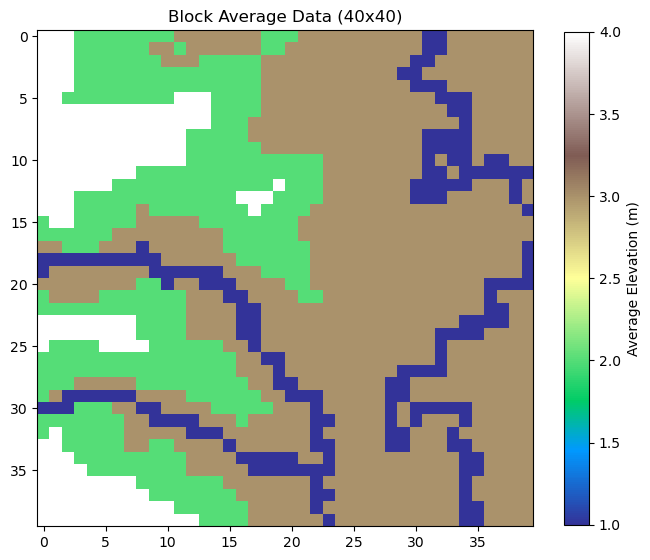

In [7]:
result = np.where(labels == 1, labels, kmean_M_2d)


plt.figure(figsize=(8, 8))
cmap = 'terrain'

plt.imshow(result, cmap=cmap)
plt.colorbar(shrink=0.8, label='Average Elevation (m)')
plt.title('Block Average Data (40x40)')

plt.show()

In [8]:
merged_array = np.load('merged_array.npy')

In [17]:
np.random.seed(42) 

block_size = 250

def split_into_blocks(array, block_size):
    n_blocks = array.shape[0] // block_size
    blocks = []
    for i in range(n_blocks):
        for j in range(n_blocks):
            block = array[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size]
            blocks.append(block)
    return np.array(blocks)

input_blocks = split_into_blocks(merged_array, block_size)
#label_blocks = split_into_blocks(label_array, block_size)
#label_blocks = np.array([np.any(block > threshold) for block in input_blocks]).astype(np.uint8)
#label_blocks = np.array([label_block(block, mountain_threshold, river_threshold) for block in input_blocks])
label_blocks = result - 1

In [18]:
label_blocks = label_blocks.reshape(1600,1)
print(label_blocks.shape)
print(input_blocks.shape)

(1600, 1)
(1600, 250, 250)


In [19]:
from sklearn.model_selection import train_test_split

input_blocks_train, input_blocks_test, label_blocks_train, label_blocks_test = train_test_split(
    input_blocks, label_blocks, test_size=0.2, random_state=42, stratify=label_blocks
)

print(f"input_blocks_train: {input_blocks_train.shape}")
print(f"label_blocks_train: {label_blocks_train.shape}")
print(f"input_blocks_test: {input_blocks_test.shape}")
print(f"label_blocks_test: {label_blocks_test.shape}")

input_blocks_train: (1280, 250, 250)
label_blocks_train: (1280, 1)
input_blocks_test: (320, 250, 250)
label_blocks_test: (320, 1)


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, ZeroPadding2D



model = tf.keras.models.Sequential([
    
    
    
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(250, 250, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(256,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(256,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4),
    
    
    #tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu'),
    #tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu'),
    #tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='relu'),

    # output
    #tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')
])


C:\Users\LYA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 248, 248, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 124, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 122, 122, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 59, 59, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 27, 27, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,321,412 (16.48 MB)

 Trainable params: 4,321,412 (16.48 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
from tensorflow.keras.optimizers import Adam
#optimizer = Adam(learning_rate=0.001)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(input_blocks_train, label_blocks_train, epochs=10, 
                    validation_data=(input_blocks_test, label_blocks_test))


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8181 - loss: 0.5261 - val_accuracy: 0.8344 - val_loss: 0.3981
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.8525 - loss: 0.3557 - val_accuracy: 0.8125 - val_loss: 0.4152
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8555 - loss: 0.3495 - val_accuracy: 0.8656 - val_loss: 0.3337
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.8806 - loss: 0.3104 - val_accuracy: 0.8250 - val_loss: 0.3876
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.8932 - loss: 0.3041 - val_accuracy: 0.8531 - val_loss: 0.3475
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.8371 - loss: 0.4488 - val_accuracy: 0.7594 - val_loss: 0.5866
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.8379 - loss: 0.3925 - val_accuracy: 0.8438 - val_loss: 0.3921
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.8668 - loss: 0.3377 - val_accuracy: 0.8813 - val_loss:

In [18]:
model.export('NZ24_model')

INFO:tensorflow:Assets written to: NZ24_model\assets


INFO:tensorflow:Assets written to: NZ24_model\assets


Saved artifact at 'NZ24_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 250, 250, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  2327328818448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2327328819504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2327328818976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2327328819328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2327328818624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2327328818800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2327328820208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2327328820736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2327328818096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2327328821264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2327328821616: TensorSpec(shape=(), dtyp

In [ ]:
#model = tf.keras.models.load_model('NZ24_model')

10/10 - 3s - 328ms/step - accuracy: 0.8656 - loss: 0.3394


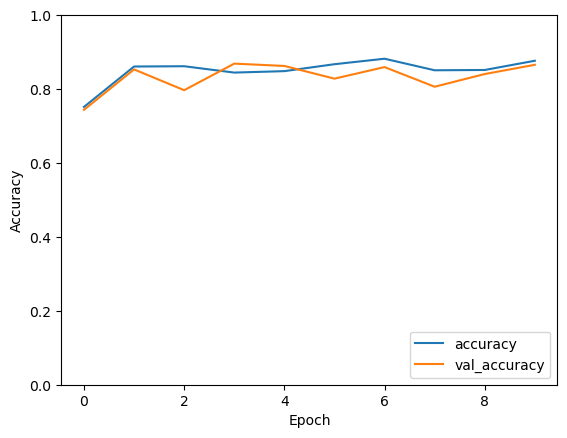

In [27]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(input_blocks_test,  label_blocks_test, verbose=2)

In [21]:
predictions = model.predict(input_blocks_test)
#predicted_labels = (predictions > 0.5).astype(np.uint8)

predicted_labels = np.argmax(predictions, axis=1)

for i in range(len(input_blocks_test)):
    print(f"Sample {i}: Predicted label: {predicted_labels[i]}, True label: {label_blocks_test[i]}, Probabilities: {predictions[i]}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 321ms/step
Sample 0: Predicted label: 3, True label: [3], Probabilities: [-9.66507    6.6310596 -5.9194965 12.136717 ]
Sample 1: Predicted label: 2, True label: [2], Probabilities: [-0.1987343  1.1956347  2.3794239 -4.169967 ]
Sample 2: Predicted label: 2, True label: [2], Probabilities: [ 2.251672  -2.5570114  4.0438395 -6.9839435]
Sample 3: Predicted label: 2, True label: [0], Probabilities: [ 1.4169071 -1.1360364  3.5371306 -6.2635355]
Sample 4: Predicted label: 3, True label: [3], Probabilities: [-7.1700535  5.4819756 -4.1698823  8.386846 ]
Sample 5: Predicted label: 2, True label: [0], Probabilities: [ 2.2661643 -2.7099571  4.1481686 -7.059827 ]
Sample 6: Predicted label: 2, True label: [0], Probabilities: [ 2.317175  -2.7404835  4.1457577 -7.1050553]
Sample 7: Predicted label: 1, True label: [1], Probabilities: [-4.665868   5.1129947 -1.7656829  3.4432583]
Sample 8: Predicted label: 1, True label: [1], Probabilities: [-4.956976   5.1653786 -2.0554183

In [30]:
predictions = model.predict(input_blocks)
predicted_labels = np.argmax(predictions, axis=1)

50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 319ms/step


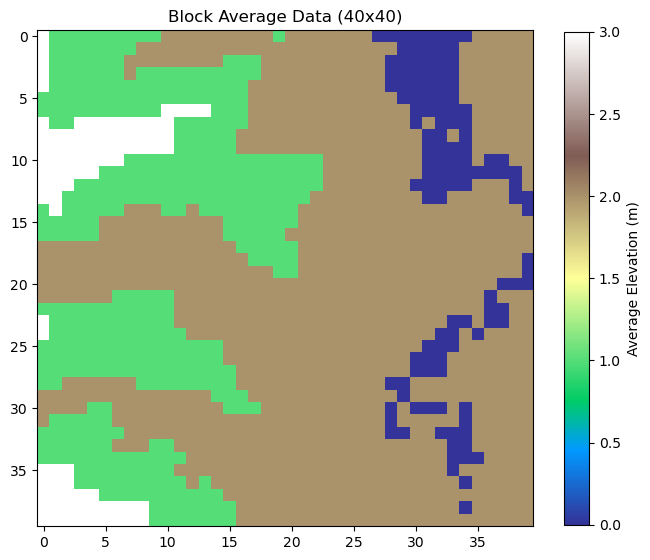

In [31]:
predicted_labels_2d = predicted_labels.reshape(40,40)

plt.figure(figsize=(8, 8))
cmap = 'terrain'

plt.imshow(predicted_labels_2d, cmap=cmap)
plt.colorbar(shrink=0.8, label='Average Elevation (m)')
plt.title('Block Average Data (40x40)')

plt.show()

In [32]:
#average height
def block_average(arr, block_size):
    shape = (arr.shape[0] // block_size, arr.shape[1] // block_size)
    sh = shape[0], block_size, shape[1], block_size
    return arr.reshape(sh).mean(-1).mean(1)

block_size = 250
block_average_array = block_average(merged_array, block_size)

# 将平均值的数组重塑为40x40
block_average_2d = block_average_array.reshape((40, 40))

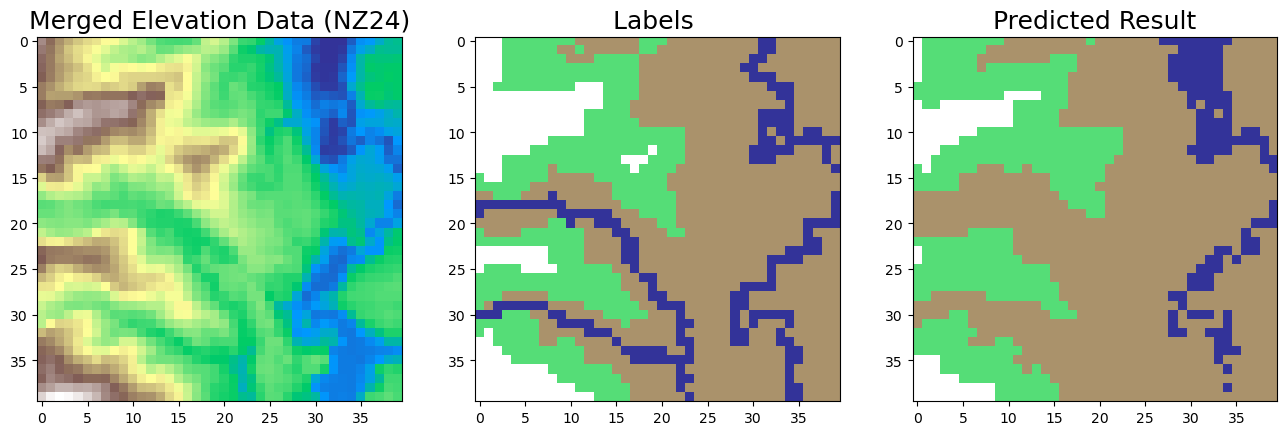

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

cmap = 'terrain'

# merged_array plot
im1 = axes[0].imshow(block_average_2d, cmap=cmap)
axes[0].set_title('Merged Elevation Data (NZ24)',fontsize=18)
#fig.colorbar(im1, ax=axes[0], shrink=0.8, label='Elevation (m)')

# label plot
im2 = axes[1].imshow(result, cmap=cmap)
axes[1].set_title('Labels ',fontsize=18)
#fig.colorbar(im2, ax=axes[1], shrink=0.8, label='Cluster')

# predicted label plot
im3 = axes[2].imshow(predicted_labels_2d, cmap=cmap)
axes[2].set_title('Predicted Result',fontsize=18)
#fig.colorbar(im2, ax=axes[2], shrink=0.8, label='Cluster')


plt.savefig('NZ24_CNN.png', bbox_inches='tight')  # 保存图像为 PNG 文件
# show
plt.show()

In [36]:
NY30_merged_array = np.load('NY30_merged_array.npy')

In [37]:
NY30_blocks = split_into_blocks(NY30_merged_array, block_size)

In [38]:
NY30_predictions = model.predict(NY30_blocks)
NY30_predicted_labels = np.argmax(NY30_predictions, axis=1)

50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 312ms/step


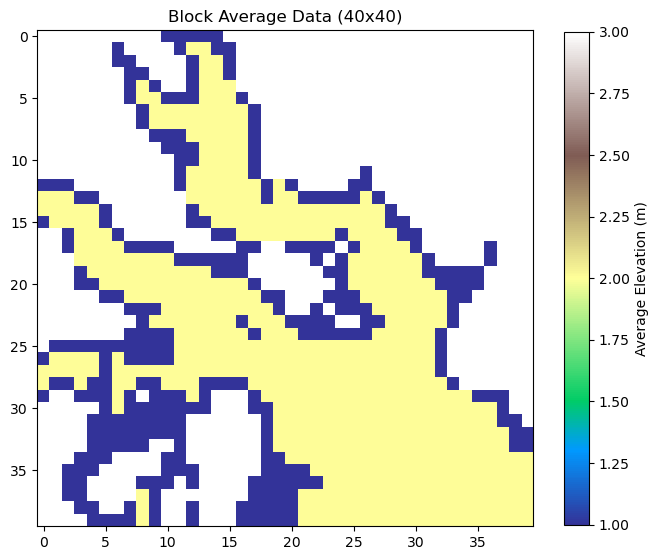

In [39]:
NY30_predicted_labels_2d = NY30_predicted_labels.reshape(40,40)

plt.figure(figsize=(8, 8))
cmap = 'terrain'

plt.imshow(NY30_predicted_labels_2d, cmap=cmap)
plt.colorbar(shrink=0.8, label='Average Elevation (m)')
plt.title('Block Average Data (40x40)')

plt.show()

In [40]:
NY30_average_array = block_average(NY30_merged_array, block_size)

# 将平均值的数组重塑为40x40
NY30_average_2d = NY30_average_array.reshape((40, 40))

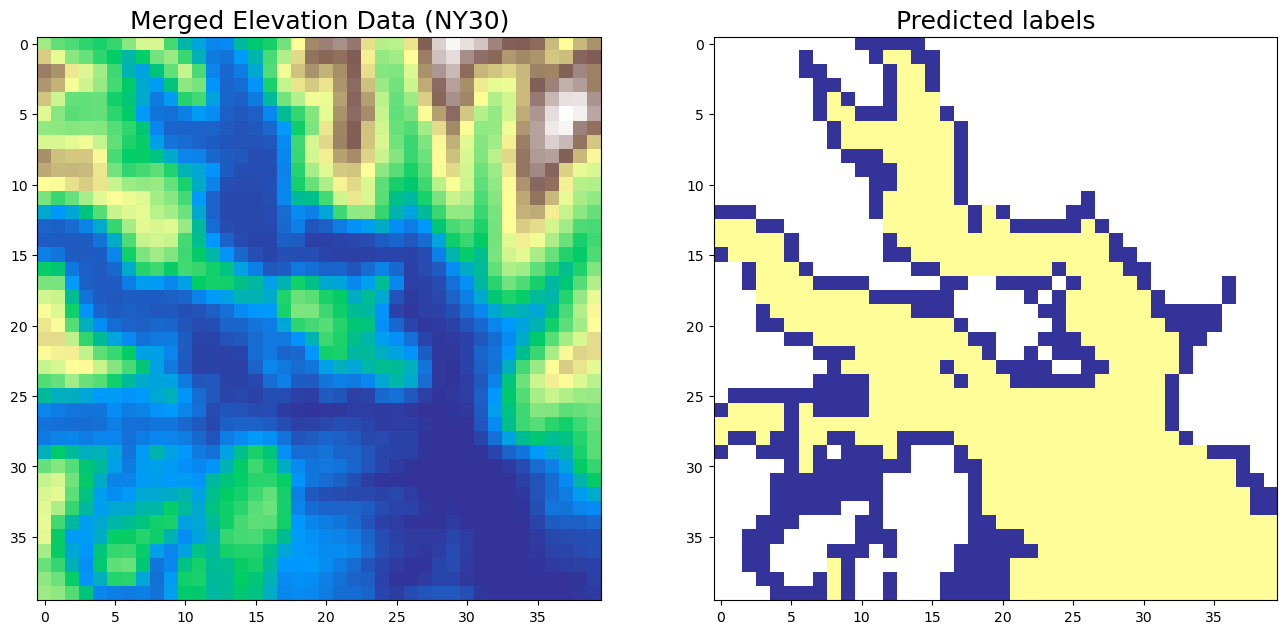

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

cmap = 'terrain'

# merged_array plot
im1 = axes[0].imshow(NY30_average_2d, cmap=cmap)
axes[0].set_title('Merged Elevation Data (NY30)',fontsize=18)
#fig.colorbar(im1, ax=axes[0], shrink=0.8, label='Elevation (m)')

# predicted label plot
im3 = axes[1].imshow(NY30_predicted_labels_2d, cmap=cmap)
axes[1].set_title('Predicted labels',fontsize=18)
#fig.colorbar(im2, ax=axes[1], shrink=0.8, label='Cluster')


plt.savefig('NY30_CNN.png', bbox_inches='tight')  # 保存图像为 PNG 文件
# show
plt.show()

In [44]:
NY75_merged_array = np.load('NY75_merged_array.npy')

In [45]:
NY75_blocks = split_into_blocks(NY75_merged_array, block_size)

In [46]:
NY75_predictions = model.predict(NY75_blocks)
NY75_predicted_labels = np.argmax(NY75_predictions, axis=1)

50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 313ms/step


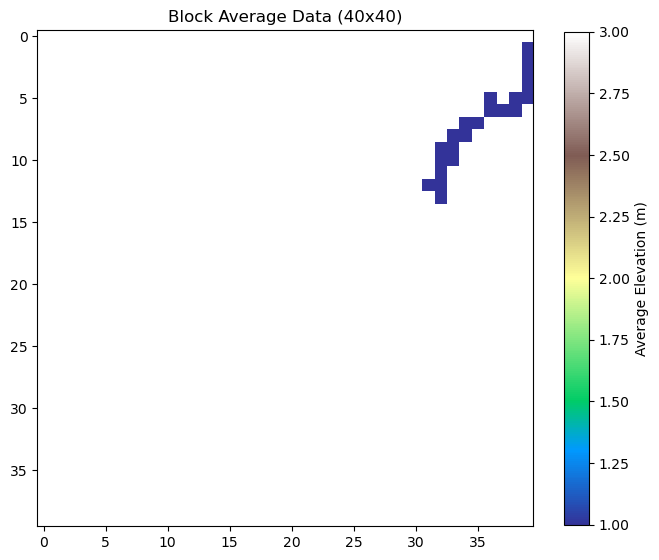

In [51]:
NY75_predicted_labels_2d = NY75_predicted_labels.reshape(40,40)

plt.figure(figsize=(8, 8))
cmap = 'terrain'

plt.imshow(NY75_predicted_labels_2d, cmap=cmap)
plt.colorbar(shrink=0.8, label='Average Elevation (m)')
plt.title('Block Average Data (40x40)')

plt.show()

In [49]:
NY75_average_array = block_average(NY75_merged_array, block_size)

# 将平均值的数组重塑为40x40
NY75_average_2d = NY75_average_array.reshape((40, 40))

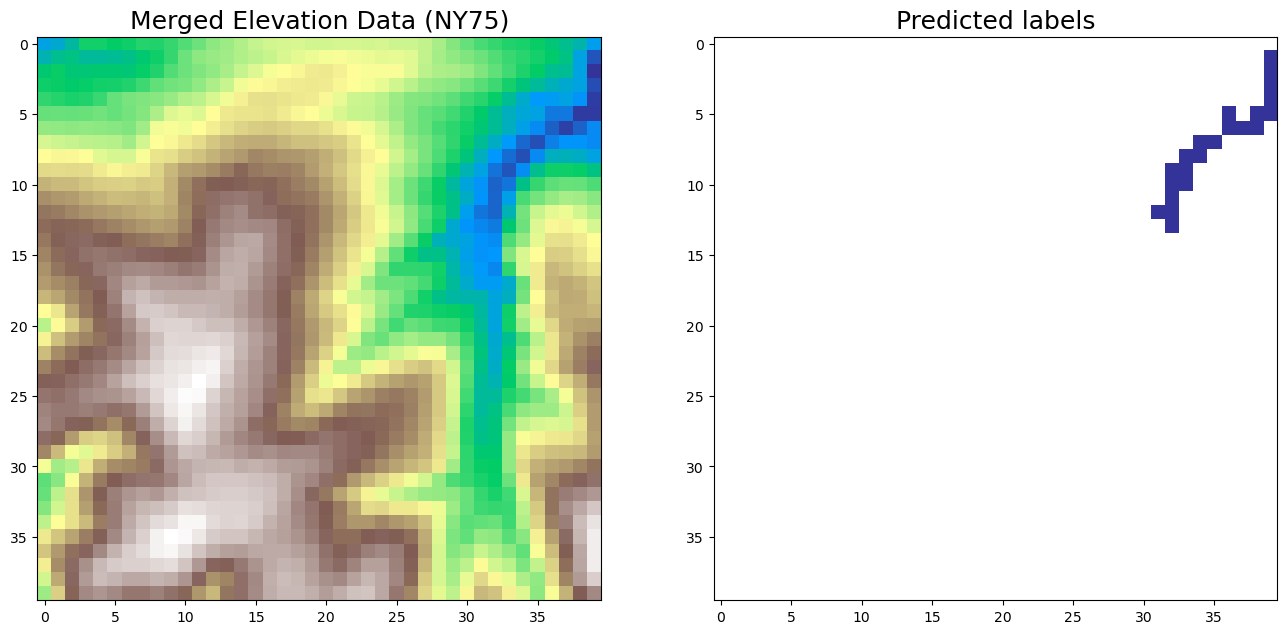

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

cmap = 'terrain'

# merged_array plot
im1 = axes[0].imshow(NY75_average_2d, cmap=cmap)
axes[0].set_title('Merged Elevation Data (NY75)',fontsize=18)
#fig.colorbar(im1, ax=axes[0], shrink=0.8, label='Elevation (m)')

# predicted label plot
im3 = axes[1].imshow(NY75_predicted_labels_2d, cmap=cmap)
axes[1].set_title('Predicted labels',fontsize=18)
#fig.colorbar(im2, ax=axes[1], shrink=0.8, label='Cluster')


plt.savefig('NY75_CNN.png', bbox_inches='tight')  # 保存图像为 PNG 文件
# show
plt.show()